This notebook demonstrates the process of model fitting using the popular Iris flower dataset.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Let us load the Iris dataset (https://archive.ics.uci.edu/ml/datasets/iris). 

In [2]:
# load data
X = np.loadtxt('iris.data', delimiter=',', usecols=[0,1,2,3], dtype=float)
y = np.loadtxt('iris.data', delimiter=',', usecols=[4], dtype=str)

target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# convert labels
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(np.int32)

### (1) Splitting up Dataset

Split up the data into three parts: training set, validation set, and test set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=10)

### (2) Model Parameter Search (Validation Phase)

We do not know a good assignment for the model parameter 'k' beforehand (which is called n_neighbors in the constructor of the 'KNeighborsClassifier' class). Hence, we have to "grid search" for it via a validation set. During this process, we monitor the accuracy on the validation set.

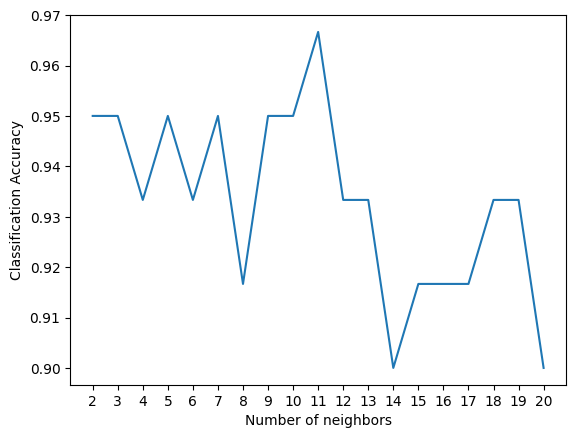

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# the "grid" of parameters to be tested
n_neighbors_range = range(2,21)

# For each k, we compute the accuracy on the validation set
# (accuracy = percentage of correctly classified instances)

validation_accuracies = []
for k in n_neighbors_range:
    
    # instantiate model and fit model
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_tr, y_tr)
    
    # compute accuracy on validation set
    val_preds = model.predict(X_val)
    acc = accuracy_score(val_preds, y_val)
    
    validation_accuracies.append(acc)
    
# plot the induced validation accuracies
plt.plot(n_neighbors_range, validation_accuracies)
plt.xlabel('Number of neighbors')
plt.xticks(n_neighbors_range)
plt.ylabel('Classification Accuracy')
plt.show()    


### (3) Final Model Parameter & Final Model

Finally, we pick the model that performs best w.r.t. the validation accuracy and use all the training data to fit the final model. We can then also compute the accuracy on the test set (which has not been used so far!). This should give us a realistic estimate of how our model will perform in future on new, unseen instances.

In [5]:
# select best k
best_k_idx = np.argmax(np.array(validation_accuracies))
best_k = n_neighbors_range[best_k_idx]
print("Best model parameter: {}".format(best_k))

Best model parameter: 11


In [6]:
# fit final model
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [7]:
# get predictions for test set
preds = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, preds)
print("Accuracy on test set: {}".format(final_accuracy))

Accuracy on test set: 0.9666666666666667
